In [131]:
import xmltodict
import numpy as np
import matplotlib.pyplot as plt

##### ED-PP
$\mu = \frac{E (N + 1, \space N + 1) - E(N, \space N)}{2}$

$h = \frac{E (N + 1, \space N - 1) - E(N, \space N)}{2}$
##### PP-FP
$\mu = \frac{E (N + 1, \space 1) - E(N, \space 0)}{2}$

$h = \frac{E (N - 1, \space 1) - E(N, \space 0)}{-2}$
##### ED-PP
$\mu = \frac{E(1, \space 1)}{2}$

##### V-FP
$\mu = - h + E (1, \space 0)$

In [132]:
def En(j, n, m):
    Energy = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w2/t-1/"
    for i in range(n, m, 2):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
    return Energy

def En1(j, n, m):
    Energy = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w2/t-1/"
    for i in range(n, m, 4):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + 4
    return Energy

In [133]:
#E(N, 0) : (2, 0), (4, 0), ... (78, 0)
e1 = En(0, 2, 79)

#E(N+1, 1) : (3, 1), (5, 1), ... (79, 1)
e2 = En(1, 3, 80)

#E(N-1, 1) : (1, 1), (3, 1), ... (77, 1)
e3 = En(1, 1, 78)

In [139]:
#E(N, N) : (1, 1), (5, 5), ... (37, 37), (39, 39)
e4 = En1(1, 1, 38)

#E(N+1, N+1) : (2, 2), (6, 6), ... (38, 38), (40 40)
e5 = En1(2, 2, 39)

#E(N+1, N-1) : (2, 0), (6, 4), ... (38, 36), (40 38)
e6 = En1(0, 2, 39)

e4.append(En(39, 39, 40)[0])
e5.append(En(40, 40, 41)[0])
e6.append(En(38, 40, 41)[0])

In [140]:
h = []
mu = []
for x in range(len(e1)):
    h.append((e3[x] - e1[x]) / -2)
    mu.append((e2[x] - e1[x]) / 2)

h1 = []
mu1 = []
for x in range(len(e4)):
    h1.append((e6[x] - e4[x]) / 2)
    mu1.append((e5[x] - e4[x]) / 2)

e10 = En(0, 1, 2)[0]

h2 = np.arange(h[0], 2.7, 0.1)
def mu2(h):
    return - h + e10

h3 = np.arange(5.3, 8, 0.2)
def mu3(h):
    return -h - e10


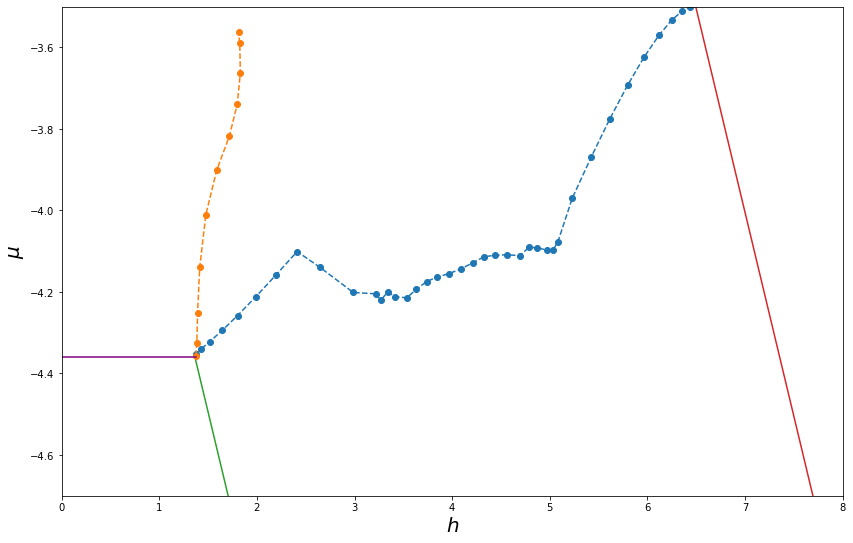

In [141]:

plt.figure(figsize=(14, 9))
xscale = 8

plt.plot(h, mu, 'o--')
plt.plot(h1, mu1, 'o--')
plt.plot(h2, mu2(h2), '-')
plt.plot(h3, mu3(h3), '-')
plt.axhline(y=(e4[0]/2), color='purple', xmax=(h[0]/xscale))
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.axis([0, xscale, -4.7, -3.5])
plt.show()